## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25
num_neurons=[[512, 256, 128], [512, 512, 256, 256, 128, 128, 64, 32, 16]]

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, neurons in enumerate(num_neurons):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %s" % (neurons))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP, num_neurons=neurons)
    model.summary()
    optimizer = keras.optimizers.Adam()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    results[i] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Experiment with Regulizer = [512, 256, 128]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (No

50000/50000 [==============================] - 2s 43us/step - loss: 1.4870 - acc: 0.4654 - val_loss: 1.4642 - val_acc: 0.4891
Epoch 50/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4734 - acc: 0.4679 - val_loss: 1.4365 - val_acc: 0.4946
Experiment with Regulizer = [512, 512, 256, 256, 128, 128, 64, 32, 16]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropo

50000/50000 [==============================] - 3s 52us/step - loss: 1.9470 - acc: 0.2511 - val_loss: 1.9122 - val_acc: 0.2727
Epoch 37/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9595 - acc: 0.2442 - val_loss: 1.9179 - val_acc: 0.2719
Epoch 38/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9364 - acc: 0.2546 - val_loss: 1.9172 - val_acc: 0.2649
Epoch 39/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9446 - acc: 0.2517 - val_loss: 1.9059 - val_acc: 0.2733
Epoch 40/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9428 - acc: 0.2520 - val_loss: 1.9219 - val_acc: 0.2584
Epoch 41/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.9396 - acc: 0.2543 - val_loss: 1.9485 - val_acc: 0.2673
Epoch 42/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.9379 - acc: 0.2560 - val_loss: 1.9379 - val_acc: 0.2705
Epoch 43/50
50000/50000 [=====================

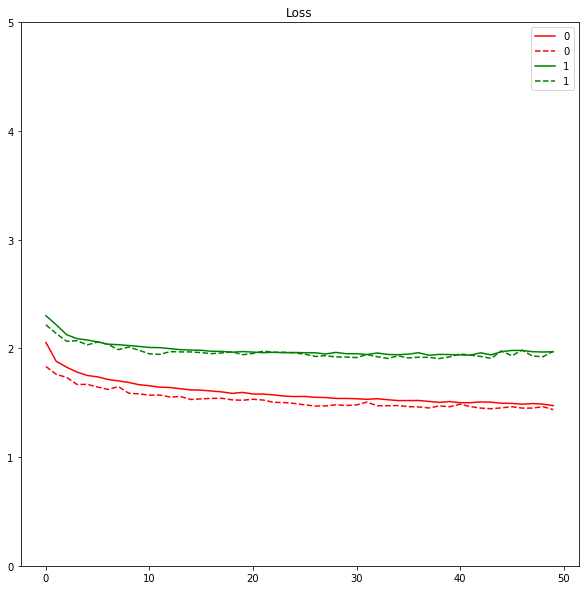

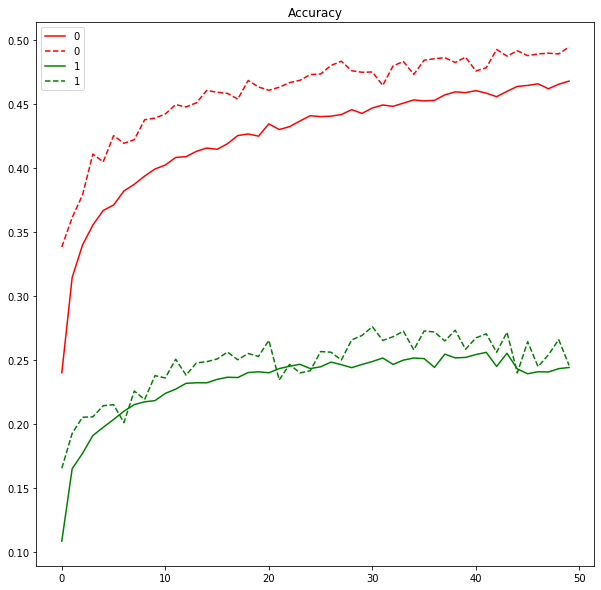

In [17]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# """Code Here
# 將結果繪出
# """

# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.plot(range(len(train_loss)), train_loss, label="train loss")
# plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
# plt.legend()
# plt.title("Loss")
# plt.show()

# plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
# plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
# plt.legend()
# plt.title("Accuracy")
# plt.show()


import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "w"]

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()